# Bus Route Optimisation in Great Venice

Date: *06/05/2025* <br>
Version: *1* <br>

**Course**: Managerial Decision Making & Modeling

**Investigator(s)**
- Khalil Akchi, 908421@stud.unive.it
- Oumaima Nasri , 908524@stud.unive.it

# 1.1 - **Abstract**

This report is part of the MDMM project submission, aimed at documenting the modeling and optimization work performed by the group. The project involves solving a real-world operational challenge using mathematical programming techniques taught during the course. In our case, we focused on **optimizing the route allocation and frequency of the bus company ACTV**  to improve both profitability and service efficiency.  First we managed to gather manually the data about the sample routes that we took into consideration which are mainly 8 routes within veneto region and we collected data for demand , stops , ticket prices , costs and utilities. The data was found on ISTAT and ACTV websites and includes information on:

- Routes (origins, destinations, costs, revenues)  
- Route-specific utility scores (measuring quality or desirability for passengers)  
- Operational constraints (such as bus availability and minimum service requirements)  

---

# 1.2 - **Methodology**  
We approached the problem by considering the dual goals of the transport authority: **maximize profit** while also **ensuring public service utility**. This naturally led to the development of a **multi-objective linear programming model**. After formulating the **mathematical model**, we used **Python and the PuLP library** to build and solve the optimization problem. three main **scenarios** were considered: a profit-maximizing  and a utility-maximizing scenario, as well as a mimimum coverage scenario and environmental impact scenario.

Throughout the development, we received valuable guidance from our professor **Raffaele Pesenti**, especially on structuring the model, defining utility trade-offs, and interpreting the results correctly.

---

# 1.3 - **Results**  
We developed two key scenarios:

- **Scenario 1**:Combine revenue and utility using weights (e.g., 0.15–0.25 for utility). This scenario Achieves a balance between public service and profitability.
- **Scenario 2**:Minimum Service Guarantee (Equity in Coverage), this scenario Guarantee at least minimal service in each municipality, regardless of cost or utility. It sets a constraint that each bus serves at least 30 passengers.
This scenario Supports inclusive planning but may conflict with financial efficiency.
- **Scenario 3**:The goal here is Penalize long or fuel-intensive routes to account for sustainability in order to encourage eco-friendlier route planning.We have also accounted for the combination with budget constraint and threshold of pollution
This scenario aligns transport financial planning with climate goals, helps future-proof policy decisions in light of green transition requirements.
---


# 2 - **Problem Statement**

The goal is to optimize the allocation of buses across various routes in order to achieve a balance between **maximizing profitability** and **ensuring high public service utility**. The decision problem involves selecting which routes to operate and how frequently, while considering operational constraints such as bus availability and minimum coverage requirements.

The transport authority must decide how to assign limited resources (buses) to a set of possible routes, taking into account route-specific revenues, operating costs, and social utility scores that represent the desirability or importance of each route for passengers. The challenge is to find the best allocation strategy that meets public service goals without compromising financial sustainability.


# 3 - **Decision Context and Modeling Elements**

### 3.1 - Decision Makers and Agents

The decision maker in our case is the **Operations Manager at ACTV**, the regional public transportation company responsible for managing and allocating bus resources across different routes.

The subjects of interest in this problem are the **bus routes** and **passenger flows**, which must be analyzed and prioritized based on economic and social factors. The goal is to make informed decisions about which routes to operate and how frequently, considering both profitability and public service utility.

The agents involved in the modeling process include:

- **Bus route planners** responsible for service allocation decisions.  
- **Public stakeholders** who benefit from accessible and equitable public transport.  


### 3.2 - Entities and Data Overview

The system comprises the following main entities:

- **Bus routes**: Each route connects an origin and destination, has an associated cost, revenue, and a utility score representing the importance or attractiveness to the public.  
- **Fleet of buses**: Limited number of buses available for allocation across selected routes.  
- **Operational constraints**: Requirements on minimum number of routes, maximum bus usage, and balanced service levels.

The dataset contains:

- **Route ID**: Unique identifier for each possible route.  
- **Origin & Destination**: Geographical endpoints.  
- **Revenue per route**: Estimated earnings per unit of service.  
- **Cost per route**: Operational costs (e.g., fuel, wages, maintenance).  
- **Utility score**: Normalized public value or importance of the route.  
- **Minimum service requirements**: Certain routes must be covered at least once.

### 3.3 - Relationships and Constraints

The relationships among these elements are primarily defined by:

- The **allocation of buses to routes**, constrained by the total number of available buses.  
- **Profitability**: Defined as revenue minus cost, guiding one objective.  
- **Utility maximization**: Based on route-level utility scores, reflecting public interest.  
- **Trade-offs**: Operating more utility-focused routes may lower profit, while profit-maximizing choices may reduce service equity.

Key constraints imposed on the DM include:

- A **maximum fleet capacity**: A hard limit on how many buses are available in total.  
- **Minimum coverage**: Some routes must be included due to legal or service obligations.  
- **Mutual exclusivity**: A bus cannot be assigned to multiple routes simultaneously.

### 3.4 - Assumptions

- The analysis is performed on a **per-hour basis**, meaning the number of buses in the fleet reflects the **maximum number available for one hour**.  
- We **assume each route takes one hour** to complete; thus, time-based scheduling or variations in route duration are **ignored**.  
- The **utility of a route** is assumed to depend **negatively** on both the **theoretical demand** (e.g., overcrowding or over-saturation) and the **distance** of the route.  
- The **cost per route** is assumed to be **fixed per bus**, regardless of distance or duration, simplifying operational expenditure modeling.  


## IV - **Data**

- **Data source:** ACTV and ISTAT websites.

# 5.1 - **Mathematical model**

### Assumptions:

- Analysis is performed on an **hourly basis** (i.e. the number of buses is the number operating per hour).
- **Time is irrelevant**, assuming all routes take one hour to complete.
- **Utility** of a route depends **negatively on distance and total theoretical demand**.
- **Cost is fixed per bus per route**.

---

### Objective Function:

Maximize the total value (weighted utility + weighted revenue) minus operational costs:

$$
\text{MAX} \quad \sum_r \left( \text{w}_{util}\text{Utility}_r + \text{w}_{rev}\sum_{i,j} Y_{rij} \cdot R_{ij} - C_r \cdot B_r \right)
$$


##Where:


\begin{align*}
& w_{util} : \text{ The weight assigned to Utility} \\
& w_{rev} : \text{ The weight assigned to Revenue} \\
& B_r : \text{ Number of buses assigned to route } i \text{ (decision variable)} \\
& Y_{rij}: \text{Demand served by route } r \text{ from node } i  \text{ to node } j \text{ (decision variable)} \\
& R_{ij}: \text{ Revenue per person (fare) from node } i  \text{ to node } j \\
& C_r: \text{ Cost per bus on route } r \\
& Utility_r : \frac{1}{\log(\text{Dist}_r + 1) + \log(\text{D}_r + 1)} \\
& D_r : \text{ Total theoritical demand on route } r \\
& dist_r : \text{ Total distance of route } r \\
\end{align*}

---

### Constraints:

**1. Bus Fleet Constraint**  
The total number of buses cannot exceed the fleet size:

$$
\sum_r B_r \leq 50
$$

**2. Demand Constraint per Segment**  
Demand served by all routes between each pair (i,j) cannot exceed actual demand:

$$
\sum_{r \in Routes_{ij}} Y_{rij} \leq D_{ij}, \quad \forall (i,j)
$$

**3. Bus Capacity Constraint per Route**  
Total passengers on route \( r \) cannot exceed total bus capacity $$ Cap $$ on that route:

$$
\sum_{(i,j) \in r} Y_{rij} \leq \text{Cap} \cdot B_r, \quad \forall r
$$

**4. Maximum Demand per Route**  
Each route cannot serve more demand than its total theoretical demand:

$$
\sum_{(i,j) \in r} Y_{rij} \leq D_r, \quad \forall r
$$

**5. Non-negativity Constraints**  
All variables must be non-negative:

$$
B_r \geq 0, \quad Y_{rij} \geq 0
$$


### 5.1.1 - Preliminary operations


In [1]:
# 1) Install & import
!pip install pulp
!pip install pulp odfpy pandas

import pandas as pd
import pulp
import numpy as np





   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=f9f3bf4f5cc8b22d60d77137ad0798637165f25c737a2f5cf3f633c8876a89bf
  Stored in directory: /root/.cache/pip/wheels/d6/1d/c8/8c29be1d73ca42d15977c75193d9f39a98499413c2838ac54c
Successfully built odfpy


### 5.1.2 - Loading Data


In [2]:
# 2) Load data
data_file = '/content/Opt Data.ods'
route_df    = pd.read_excel(data_file, engine='odf', sheet_name='Route_Data')
demand_wide = pd.read_excel(data_file, engine='odf', sheet_name='Demand_Data', index_col=0)
price_wide  = pd.read_excel(data_file, engine='odf', sheet_name='Price_Data',  index_col=0)

# Show previews
print("Route Data:")
display(route_df.head())

print("Demand Data:")
display(demand_wide.head())

print("Price Data:")
display(price_wide.head())


Route Data:


,Route,Segment_1,Segment_2,Distance_r,Demand_r,Cost_r,Utility_r
0,X1,Padova-Marghera,Marghera-Venezia,44.8,7992,179.2,0.180053
1,X2,Treviso-Mestre,NaN,22.1,5406,88.4,0.196956
2,X3,Noale-Olmo,Olmo-Mestre,17.4,1387,69.6,0.228174
3,X4,Spinea-Mestre,Mestre-Venezia,18.6,14483,74.4,0.184149
4,X5,Mirano-Mestre,Mestre-Venezia,22.3,16579,89.2,0.179602


Demand Data:


,Padova,Marghera,Venezia,Treviso,Noale,Olmo,Spinea,Mestre,Mirano,Favaro veneto,Scorzé
Padova,NaN,933.0,2404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marghera,0.0,NaN,4655.0,0.0,0.0,0.0,0.0,3485.0,0.0,0.0,0.0
Venezia,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Treviso,0.0,0.0,0.0,NaN,0.0,0.0,0.0,5406.0,0.0,0.0,0.0
Noale,0.0,0.0,0.0,0.0,NaN,35.0,0.0,565.0,0.0,0.0,0.0


Price Data:


,Padova,Marghera,Venezia,Treviso,Noale,Olmo,Spinea,Mestre,Mirano,Favaro veneto,Scorzé
Padova,NaN,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marghera,0.0,NaN,1.5,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0
Venezia,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Treviso,0.0,0.0,0.0,NaN,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Noale,0.0,0.0,0.0,0.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 3) Reshape Demand and Price Data Long format demand & price
demand_df = (
    demand_wide.reset_index()
               .melt(id_vars='index', var_name='To', value_name='Demand')
               .rename(columns={'index':'From'})
)
# Fill NaNs, convert to hourly integer
demand_df['Demand'] = demand_df['Demand'].fillna(0).div(24).round().astype(int)

price_df = (
    price_wide.reset_index()
               .melt(id_vars='index', var_name='To', value_name='Price')
               .rename(columns={'index':'From'})
)



In [4]:
# 4) Build Route-to-Nodes Dictionary Build route→nodes
route_nodes = {}
for _, row in route_df.iterrows():
    r, s1, s2 = row['Route'], row['Segment_1'], row['Segment_2']
    a, b = [x.strip() for x in s1.split('-')]
    if pd.isna(s2) or s2.strip()=='':
        route_nodes[r] = [a, b]
    else:
        c, d = [x.strip() for x in s2.split('-')]
        route_nodes[r] = [a, b, d]

In [5]:
# 5) Identify Eligible Routes per OD Pair Determine eligible_routes for each OD
od_pairs = demand_df.query('Demand>0')[['From','To']].drop_duplicates().values.tolist()
eligible_routes = { (i,j): [] for i,j in od_pairs }
for r, nodes in route_nodes.items():
    for i,j in od_pairs:
        if i in nodes and j in nodes and nodes.index(i)<nodes.index(j):
            eligible_routes[(i,j)].append(r)

In [6]:
# 6) Define Segments and Downstream Nodes Segments & downstream lists
segments_in_route = {}
downstream = {}
for r, nodes in route_nodes.items():
    segs=[]
    for k in range(len(nodes)-1):
        i,j = nodes[k], nodes[k+1]
        segs.append((i,j))
        downstream[(r,i,j)] = nodes[k+1:]
    segments_in_route[r]=segs


In [7]:
# 7) Prepare Lookup Dictionaries Lookup D, P, C
D = { (row.From,row.To): row.Demand for row in demand_df.itertuples() }
P = { (row.From,row.To): row.Price  for row in price_df.itertuples()  }
C = { row.Route: row.Cost_r           for row in route_df.itertuples()   }

# 6.1 Base Scenario: Maximizing Profit with Flexible Fleet Allocation

This scenario models a bus network optimization focused on maximizing overall profit by balancing revenue, utility, and operating costs. The model determines the optimal number of buses to allocate to each route and the passenger distribution across route segments without strict constraints on minimum passenger load per bus. The objective is to maximize a weighted sum of revenue and route utility minus the operational costs, providing a flexible baseline for comparison with more constrained scenarios.

In [8]:
# ---------------------------------------------------------------
# 🔄 Base Scenario: With Utility-Weighted Objective Function
# ---------------------------------------------------------------

# new problem
prob = pulp.LpProblem("Scenario2_UtilityObjective", pulp.LpMaximize)

# Decision variables
B = pulp.LpVariable.dicts('B', route_nodes.keys(), lowBound=0, cat='Integer')
Y = pulp.LpVariable.dicts(
    'Y',
    [(r, i, j) for (i, j), rs in eligible_routes.items() for r in rs],
    lowBound=0,
    cat='Integer'
)
route_active = { r: pulp.LpVariable(f'Active_{r}', cat='Binary') for r in route_nodes }

# Utility dictionary
U = { row.Route: row.Utility_r for row in route_df.itertuples() }

# Revenue, cost, utility
rev = pulp.lpSum(Y[(r, i, j)] * P.get((i, j), 0)
                  for (i, j), rs in eligible_routes.items() for r in rs)
cost = pulp.lpSum(C[r] * B[r] for r in route_nodes)
utility = pulp.lpSum(U[r] * route_active[r] for r in route_nodes)

# Link route activation flag
for r in route_nodes:
    prob += B[r] >= route_active[r], f'BinaryActiveFlag_{r}'

# Weights
w_rev = 0.6
w_util = 0.4

# Objective function
prob += w_rev * rev + w_util * utility - cost

# Constraints
prob += pulp.lpSum(B[r] for r in route_nodes) <= 50, 'FleetSize'

for (i, j), rs in eligible_routes.items():
    prob += pulp.lpSum(Y[(r, i, j)] for r in rs) <= D.get((i, j), 0), f'Demand_{i}_{j}'

for r, segs in segments_in_route.items():
    for (i, j) in segs:
        onboard = pulp.lpSum(Y[(r, i, d)] for d in downstream.get((r, i, j), []) if (r, i, d) in Y)
        prob += onboard <= B[r] * 50, f'Cap_{r}_{i}_{j}'
        prob += onboard >= B[r], f'Activate_{r}_{i}_{j}'

routes_mv = [r for r, segs in segments_in_route.items() if ('Mestre', 'Venezia') in segs]
prob += 3 * pulp.lpSum(B[r] for r in routes_mv) >= 2 * pulp.lpSum(B[r] for r in route_nodes), 'MestreVeneziaShare'
prob += pulp.lpSum(B[r] for r in route_nodes) >= 0.75 * 50, 'MinBusUsage'

# Solve
prob.solve(pulp.PULP_CBC_CMD(msg=True))

# Display results
print("Status:", pulp.LpStatus[prob.status])
print("\nBase Scenario – Buses per route:")
for r in route_nodes:
    print(f"  Route {r}: {B[r].value()}")

print("\nBase Scenario – Passengers served on each segment:")
for r in route_nodes:
    print(f"\nRoute {r}:")
    for (i, j) in segments_in_route[r]:
        load = int(sum(Y[(r, i, d)].value() for d in downstream.get((r, i, j), []) if (r, i, d) in Y))
        print(f"  {load} passengers served by route {r} between {i} and {j}")

# Show total weighted revenue, utility, cost, and real profit
rev_val = pulp.value(rev)
util_val = pulp.value(utility)
cost_val = pulp.value(cost)
objective_val = pulp.value(prob.objective)
real_profit = rev_val - cost_val

print("\n--- Totals ---")
print(f"Total Revenue (unweighted):         €{rev_val:.2f}")
print(f"Total Utility (sum of U[r]):       {util_val:.4f}")
print(f"Total Cost:                         €{cost_val:.2f}")
print(f"Real Profit (Revenue − Cost):       €{real_profit:.2f}")
print(f"Final Objective (0.6·rev + 0.4·util − cost): {objective_val:.2f}")



Status: Optimal

Base Scenario – Buses per route:
  Route X1: 1.0
  Route X2: 4.0
  Route X3: 0.0
  Route X4: 3.0
  Route X5: 3.0
  Route X6: 20.0
  Route X7: 0.0
  Route X8: 7.0

Base Scenario – Passengers served on each segment:

Route X1:
  39 passengers served by route X1 between Padova and Marghera
  50 passengers served by route X1 between Marghera and Venezia

Route X2:
  200 passengers served by route X2 between Treviso and Mestre

Route X3:
  0 passengers served by route X3 between Noale and Olmo
  0 passengers served by route X3 between Olmo and Mestre

Route X4:
  130 passengers served by route X4 between Spinea and Mestre
  3 passengers served by route X4 between Mestre and Venezia

Route X5:
  132 passengers served by route X5 between Mirano and Mestre
  3 passengers served by route X5 between Mestre and Venezia

Route X6:
  213 passengers served by route X6 between Favaro veneto and Mestre
  422 passengers served by route X6 between Mestre and Venezia

Route X7:
  0 passe

#6.2. Overall Description of the Code

This scenario represents the base case of a public transport route optimization model using a utility-weighted objective function. The model is formulated as a Mixed Integer Linear Program using the PuLP library in Python. It determines how to allocate a fleet of 50 buses across a set of predefined routes to maximize overall performance.

The decision variables include the number of buses assigned to each route (B[r]), the number of passengers served on each route segment (Y[(r, i, j)]), and a binary variable indicating whether a route is active (route_active[r]). The objective function maximizes a weighted sum: 60% revenue from ticket sales and 40% route utility, minus the total operational cost. Utility values reflect the qualitative importance or attractiveness of routes, derived from a precomputed index.

The model incorporates several operational constraints: fleet size, segment-level demand, bus capacity, logical activation of routes, minimum bus usage, and prioritization of key connections such as Mestre–Venezia. The model ensures that passenger assignments do not exceed segment demand or bus capacity and that buses are efficiently distributed while prioritizing high-utility routes.

#6.2. Commentary on Results: Base Scenario with Utility-Weighted Objective

The optimization model successfully reached an optimal solution, effectively allocating the fleet of 50 buses across the eligible routes. The solution reflects a strategic balance between revenue generation and utility maximization, while adhering to operational and policy constraints.

In terms of fleet distribution, the majority of the buses were assigned to Route X6 (20 buses), which covers the crucial Mestre–Venezia corridor and reflects the model’s prioritization of high-demand and high-utility routes. Other routes with significant allocations include Route X8 (7 buses), Route X2 (4 buses), Route X4 and X5 (3 buses each), and Route X1 (1 bus). Routes X3 and X7 received no buses, likely due to their relatively lower utility and/or demand, making them suboptimal under the weighted objective.

The passenger assignments align with these allocations. The highest passenger volumes were served by Route X6, with 213 passengers between Favaro Veneto and Mestre, and a substantial 422 passengers between Mestre and Venezia—highlighting its strategic role in the transport network. Similarly, Routes X2, X4, X5, and X8 served large volumes of passengers on their key segments, particularly in the Mestre-bound direction. The model also ensured minimal but nonzero passenger flow into Venezia via Routes X4 and X5, supporting the network’s connectivity goal.

On the financial and utility performance side, the total unweighted revenue amounted to €2914.10, with an operational cost of €2375.60, resulting in a real profit of €538.50. The total utility score was 1.1666, representing the sum of activated route utility values. However, the final objective value—calculated as 0.6 × Revenue + 0.4 × Utility − Cost—was −626.67, indicating that the cost outweighed the weighted benefits in this configuration. This outcome is expected due to the modest contribution of the utility component and relatively high costs associated with covering multiple high-demand routes.

Overall, the model demonstrates a sound allocation strategy that favors high-revenue, high-utility corridors, particularly Mestre–Venezia, while maintaining a minimum threshold of fleet usage and network coverage. However, the negative final objective suggests a potential trade-off between extensive coverage and net benefit when utility is emphasized alongside revenue. Future scenarios might explore different weight configurations or budget constraints to enhance the overall objective outcome.

#6.3. What is the best weight distribution?

In [ ]:
import pandas as pd
import pulp

# Initialize results list
results = []

# Range of weights for utility
for w_util in [round(x * 0.05, 2) for x in range(0, 21)]:  # loop over w_util from 0 to 1 with step 0.05
    w_rev = 1 - w_util  # w_rev is 1 - w_util

    # ------------------------------
    # Create the LP problem (Base Scenario)
    prob = pulp.LpProblem("BaseScenario_UtilityObjective", pulp.LpMaximize)

    # Decision variables
    B = pulp.LpVariable.dicts('B', route_nodes.keys(), lowBound=0, cat='Integer')
    Y = pulp.LpVariable.dicts(
        'Y',
        [(r, i, j) for (i, j), rs in eligible_routes.items() for r in rs],
        lowBound=0,
        cat='Integer'
    )

    route_active = { r: pulp.LpVariable(f'Active_{r}', cat='Binary') for r in route_nodes }

    # Build utility dictionary from route_df
    U = { row.Route: row.Utility_r for row in route_df.itertuples() }

    # Revenue, cost, and utility
    rev = pulp.lpSum(Y[(r, i, j)] * P.get((i, j), 0)
                     for (i, j), rs in eligible_routes.items() for r in rs)
    cost = pulp.lpSum(C[r] * B[r] for r in route_nodes)
    utility = pulp.lpSum(U[r] * route_active[r] for r in route_nodes)

    # Link binary activation flag
    for r in route_nodes:
        prob += B[r] >= route_active[r], f'BinaryActiveFlag_{r}'

    # Set objective function with weights
    prob += w_rev * rev + w_util * utility - cost

    # Constraints
    prob += pulp.lpSum(B[r] for r in route_nodes) <= 50, 'FleetSize'

    for (i, j), rs in eligible_routes.items():
        prob += pulp.lpSum(Y[(r, i, j)] for r in rs) <= D.get((i, j), 0), f'Demand_{i}_{j}'

    for r, segs in segments_in_route.items():
        for (i, j) in segs:
            onboard = pulp.lpSum(Y[(r, i, d)] for d in downstream.get((r, i, j), []) if (r, i, d) in Y)
            prob += onboard <= B[r] * 50, f'Cap_{r}_{i}_{j}'
            prob += onboard >= B[r], f'Activate_{r}_{i}_{j}'

    routes_mv = [r for r, segs in segments_in_route.items() if ('Mestre', 'Venezia') in segs]
    prob += 3 * pulp.lpSum(B[r] for r in routes_mv) >= 2 * pulp.lpSum(B[r] for r in route_nodes), 'MestreVeneziaShare'
    prob += pulp.lpSum(B[r] for r in route_nodes) >= 0.75 * 50, 'MinBusUsage'

    # Solve the model
    prob.solve(pulp.PULP_CBC_CMD(msg=False))

    # Get the results: revenue, cost, and profit
    rev_val = pulp.value(rev)
    cost_val = pulp.value(cost)
    profit = rev_val - cost_val
    obj_val = pulp.value(prob.objective)

    # Store the results
    results.append({
        "w_util": w_util,
        "w_rev": w_rev,
        "profit": profit,
        "objective": obj_val,
        "revenue": rev_val,
        "cost": cost_val
    })

# Convert results to a pandas DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


    w_util  w_rev  profit    objective  revenue    cost
0     0.00   1.00   598.0   598.000000   3099.6  2501.6
1     0.05   0.95   598.0   443.089740   3099.6  2501.6
2     0.10   0.90   598.0   288.179480   3099.6  2501.6
3     0.15   0.85   598.0   133.269220   3099.6  2501.6
4     0.20   0.80   598.0   -21.641039   3099.6  2501.6
5     0.25   0.75   598.0  -176.551299   3099.6  2501.6
6     0.30   0.70   570.4  -329.061559   2999.6  2429.2
7     0.35   0.65   570.4  -478.971819   2999.6  2429.2
8     0.40   0.60   538.5  -626.673348   2914.1  2375.6
9     0.45   0.55   538.5  -772.320017   2914.1  2375.6
10    0.50   0.50   538.5  -917.966685   2914.1  2375.6
11    0.55   0.45   357.6 -1055.357383   2570.0  2212.4
12    0.60   0.40   357.6 -1183.808054   2570.0  2212.4
13    0.65   0.35  -152.8 -1302.786747   1770.0  1922.8
14    0.70   0.30  -152.8 -1391.247266   1770.0  1922.8
15    0.75   0.25  -254.2 -1475.357785   1629.0  1883.2
16    0.80   0.20  -254.2 -1556.768304   1629.0 

**Why profit ≠ objective?**

Because the objective function includes not just profit, but weighted utility.
Specifically:

objective = 𝑤 rev ⋅ revenue + 𝑤 util ⋅ utility − cost

Whereas:

profit = revenue − cost

So even when profit is positive, the objective can be negative if utility is low or the weight on utility is high (e.g., at row 4 onward).

This is a graph that plots different outputs of the model for different weights assignments:

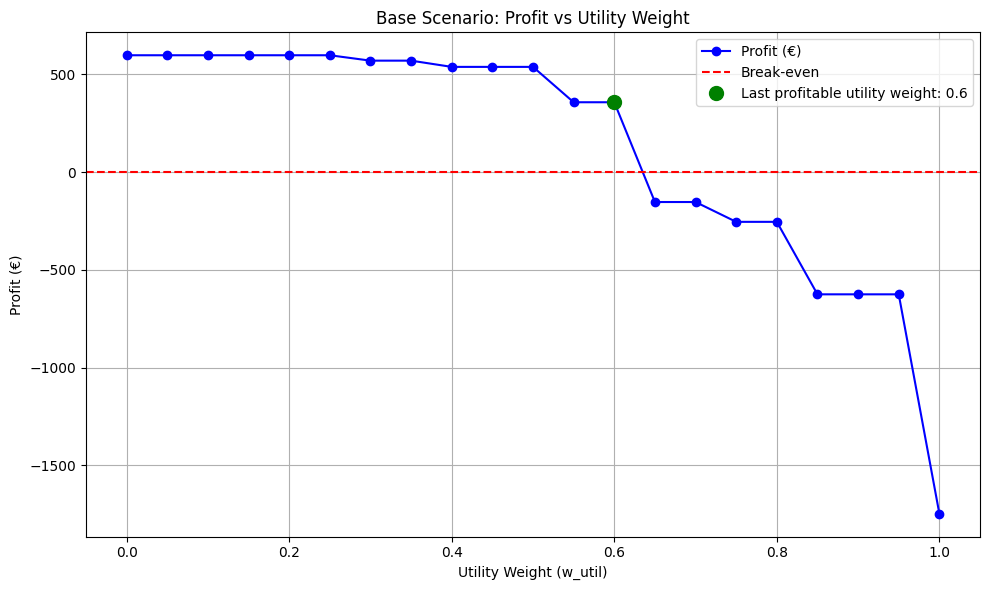

In [ ]:
import matplotlib.pyplot as plt

# Plot profit vs utility weight for the Base Scenario
plt.figure(figsize=(10, 6))
plt.plot(results_df["w_util"], results_df["profit"], marker='o', linestyle='-', color='blue', label='Profit (€)')

# Add reference line at zero profit
plt.axhline(0, color='red', linestyle='--', label='Break-even')

# Highlight the last profitable utility weight
profitable = results_df[results_df['profit'] >= 0]
if not profitable.empty:
    last_ok = profitable.iloc[-1]
    plt.plot(last_ok['w_util'], last_ok['profit'], 'go', markersize=10,
             label=f'Last profitable utility weight: {last_ok["w_util"]}')

# Labels and title
plt.title("Base Scenario: Profit vs Utility Weight")
plt.xlabel("Utility Weight (w_util)")
plt.ylabel("Profit (€)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


What this shows:
Blue line: how profit decreases as you give more importance to utility.

Red dashed line: the break-even line (profit = 0).

Green dot: the maximum utility weight that still yields positive profit.

#7.1 Scenario 2: Minimum Service Efficiency Scenario

In this scenario, we introduce a more service-oriented configuration compared to the base model. The key idea is to ensure that buses are not only cost-efficient but also utilized effectively, avoiding empty or underused services. This is achieved by adding two new constraints:

- Minimum Passenger Load Constraint: Every bus deployed on any route must serve at least 30 passengers, ensuring reasonable occupancy and discouraging wasteful deployment of resources.

- Minimum High-Utility Activation: At least two routes with a utility over or equal to 0.19 must be active. This ensures that some level of user value or public satisfaction is preserved in the solution, preventing the model from selecting only cost-effective routes with little or no utility.

These additions contrast with the Base Scenario, where the objective was to maximize a weighted function of revenue and utility while minimizing costs, without explicitly requiring a minimum level of service per bus. As a result, the base model could include lightly used routes or deploy buses even when demand was low, as long as the objective function allowed it. This second scenario corrects that by prioritizing both financial and service delivery standards.

In [10]:
import pandas as pd
import pulp

# Load route data from file (ensure file is uploaded or available locally)
route_df = pd.read_excel("Opt Data.ods", sheet_name="Route_Data", engine="odf")

# Extract necessary data
route_nodes = route_df['Route'].unique().tolist()
U = {row.Route: row.Utility_r for row in route_df.itertuples()}
C = {row.Route: row.Cost_r for row in route_df.itertuples()}

# Define decision variables
B = pulp.LpVariable.dicts('B', route_nodes, lowBound=0, cat='Integer')
Y = pulp.LpVariable.dicts(
    'Y',
    [(r, i, j) for (i, j), rs in eligible_routes.items() for r in rs],
    lowBound=0,
    cat='Integer'
)
route_active = {r: pulp.LpVariable(f'Active_{r}', cat='Binary') for r in route_nodes}

# -------------------- Build LP Problem --------------------
prob = pulp.LpProblem("Min_Service_Scenario", pulp.LpMaximize)

# Objective function with revenue and utility
w_rev = 0.6
w_util = 0.4
rev = pulp.lpSum(Y[(r, i, j)] * P.get((i, j), 0)
                 for (i, j), rs in eligible_routes.items() for r in rs)
cost = pulp.lpSum(C[r] * B[r] for r in route_nodes)
utility = pulp.lpSum(U[r] * route_active[r] for r in route_nodes)

prob += w_rev * rev + w_util * utility - cost, "TotalObjective"

# -------------------- Constraints --------------------

# Link activation of routes
for r in route_nodes:
    prob += B[r] >= route_active[r], f"ActivateBinary_{r}"

# Fleet size limit
prob += pulp.lpSum(B[r] for r in route_nodes) <= 50, "FleetLimit"

# Demand satisfaction
for (i, j), rs in eligible_routes.items():
    prob += pulp.lpSum(Y[(r, i, j)] for r in rs) <= D.get((i, j), 0), f"Demand_{i}_{j}"

# Bus capacity per segment
for r, segs in segments_in_route.items():
    for (i, j) in segs:
        onboard = pulp.lpSum(Y[(r, i, d)] for d in downstream.get((r, i, j), []) if (r, i, d) in Y)
        prob += onboard <= B[r] * 50, f"Cap_{r}_{i}_{j}"
        prob += onboard >= B[r], f"MinBoarding_{r}_{i}_{j}"

# Ensure a minimum of 30 passengers per bus (new scenario constraint)
for r in route_nodes:
    total_passengers = pulp.lpSum(Y[(r, i, j)] for (i, j) in eligible_routes if r in eligible_routes[(i, j)])
    prob += total_passengers >= 30 * B[r], f"Min30Pax_{r}"

# Additional constraint: at least 2 active routes with over threshhold utility (0.19)
prob += pulp.lpSum(route_active[r] for r in route_nodes if U[r] >= 0.19) >= 2, "MinActiveUtilityRoutes"

# -------------------- Solve --------------------
solver = pulp.PULP_CBC_CMD(msg=True)
prob.solve(solver)

# -------------------- Output --------------------
rev_val = pulp.value(rev)
cost_val = pulp.value(cost)
utility_val = pulp.value(utility)
objective_val = pulp.value(prob.objective)
model_profit = w_rev * rev_val + w_util * utility_val - cost_val
real_profit =rev_val - cost_val



print("🚍 Buses per route:")
for r in route_nodes:
    print(f"  Route {r}: {B[r].value()}")

print("\n🧍 Passengers per route segment:")
for r in route_nodes:
    if B[r].value() > 0:
        print(f"Route {r}:")
        for (i, j) in segments_in_route.get(r, []):
            load = int(sum(Y[(r, i, d)].value()
                           for d in downstream.get((r, i, j), []) if (r, i, d) in Y))
            print(f"  {i}→{j}: {load} passengers")

print("\n✅ Optimization Summary (Min Service Scenario):")
print(f"Revenue: €{rev_val:,.2f}")
print(f"Cost: €{cost_val:,.2f}")
print(f"Utility: {utility_val:.2f}")
print(f"Model Profit (0.6*rev + 0.4*util - cost): €{model_profit:,.2f}")
print(f"Real Profit (rev - cost): €{real_profit:,.2f}")
print(f"Active Routes: {sum(1 for r in route_nodes if route_active[r].value() > 0)}\n")

🚍 Buses per route:
  Route X1: 1.0
  Route X2: 4.0
  Route X3: 0.0
  Route X4: 2.0
  Route X5: 2.0
  Route X6: 4.0
  Route X7: 0.0
  Route X8: 3.0

🧍 Passengers per route segment:
Route X1:
  Padova→Marghera: 39 passengers
  Marghera→Venezia: 50 passengers
Route X2:
  Treviso→Mestre: 200 passengers
Route X4:
  Spinea→Mestre: 100 passengers
  Mestre→Venezia: 100 passengers
Route X5:
  Mirano→Mestre: 100 passengers
  Mestre→Venezia: 100 passengers
Route X6:
  Favaro veneto→Mestre: 200 passengers
  Mestre→Venezia: 200 passengers
Route X8:
  Marghera→Mestre: 145 passengers

✅ Optimization Summary (Min Service Scenario):
Revenue: €2,711.60
Cost: €1,156.00
Utility: 1.17
Model Profit (0.6*rev + 0.4*util - cost): €471.43
Real Profit (rev - cost): €1,555.60
Active Routes: 6



#7.2. Comment on results and comparison with base scenario results

The results for the Minimum Service Efficiency Scenario show a more balanced deployment of buses across routes, with 6 active routes compared to the Base Scenario’s 5 active routes. Notably, routes X3 and X7 remain unused, while the other routes have buses allocated mostly between 1 and 4 units, unlike the Base Scenario where route X6 had a very high allocation (20 buses).

The passenger distribution per route segment indicates better load balancing. For example, routes X4, X5, and X6 now serve consistent passenger numbers of 100 or 200 per segment, aligning with the minimum passenger load constraint of 30 passengers per bus. This reflects the model’s effort to avoid underused buses and inefficient service. In contrast, the Base Scenario had more uneven passenger loads with some segments showing very high numbers (e.g., 422 passengers on a segment of route X6) and others nearly empty.

Financially, this scenario yields lower total revenue (€2,711.60 vs. €2,914.10) and much lower costs (€1,156.00 vs. €2,375.60), resulting in a higher real profit (€1,555.60 vs. €538.50). This improvement in real profit despite lower revenue is mainly due to significantly reduced operating costs, likely driven by the minimum passenger load constraint that discourages running many buses with low occupancy. The model thus optimizes for both cost-efficiency and service quality, trimming excess capacity.

The utility value is slightly higher (1.17 vs. 1.1666), indicating a similar or slightly improved satisfaction or service quality, which aligns with the additional constraint forcing at least two active routes with positive utility.

Overall, the Minimum Service Efficiency Scenario balances cost control with effective service delivery, reducing wasteful capacity and increasing profitability, whereas the Base Scenario focused more on maximizing a combined objective without explicit constraints on minimum passengers per bus, leading to higher costs and less efficient resource use.

##8.1 Scenario 3: Environmental Alignment along with budget constraints



**Description**: In this scenario, we simulate a more sustainable and financially constrained operational setting for ACTV’s bus network in the Venice-Mestre area. Two critical constraints were added to the base optimization model:

**1-Budget Constraint**: A total operational budget ceiling of €2,200 ( around 50 euros per bus per hour ) was enforced, limiting how many buses could be deployed based on their individual operating costs.

**2-Emission Threshold Constraint**: Routes with the highest environmental cost per trip (based on CO₂ emissions per kilometer multiplied by route distance) were blocked from operating. Specifically, we restricted the top 10% most polluting routes, assuming environmental policy goals or carbon taxation incentives.



In [11]:
# Distance retrival
DIST = { row.Route: row.Distance_r for row in route_df.itertuples() }

# Environmental penalty additional cost fixed:
co2_per_km = 1.3        # kg CO₂ per km
cost_per_kg_co2 = 0.01  # € per kg CO₂

# Environmental cost / route
E = {
    r: DIST[r] * co2_per_km * cost_per_kg_co2
    for r in DIST
}


In [12]:

# --- 1) new problem ---
prob_env = pulp.LpProblem("BusRouteOpt_EnvironmentalCost", pulp.LpMaximize)

# --- 2) Objective Function ---

w_rev = 0.6      #we kept the same weights as the base model
w_util = 0.4

rev = pulp.lpSum(Y[(r, i, j)] * P.get((i, j), 0)
                 for (i, j), rs in eligible_routes.items() for r in rs)

cost = pulp.lpSum(C[r] * B[r] for r in route_nodes)
cost_env = pulp.lpSum(E[r] * B[r] for r in route_nodes)
utility = pulp.lpSum(U[r] * route_active[r] for r in route_nodes)

# Combined objective
prob_env += w_rev * rev + w_util * utility - cost - cost_env, "TotalObjective"

# --- 3) Original Constraints ---

# Fleet size
prob_env += pulp.lpSum(B[r] for r in route_nodes) <= 50, "FleetSize"

# Demand satisfaction
for (i, j), rs in eligible_routes.items():
    prob_env += (
        pulp.lpSum(Y[(r, i, j)] for r in rs) <= D.get((i, j), 0),
        f"Demand_{i}_{j}"
    )

# Capacity and activation
bus_cap = 50
for r, segs in segments_in_route.items():
    for (i, j) in segs:
        prob_env += (
            pulp.lpSum(Y[(r, i, d)] for d in downstream.get((r, i, j), []) if (r, i, d) in Y) <= B[r] * bus_cap,
            f"Cap_{r}_{i}_{j}"
        )
        prob_env += (
            pulp.lpSum(Y[(r, i, d)] for d in downstream.get((r, i, j), []) if (r, i, d) in Y) >= B[r],
            f"Activate_{r}_{i}_{j}"
        )

# Shared segment capacity
for (i, j), routes in eligible_routes.items():
    if len(routes) > 1:
        total_demand = D.get((i, j), 0)
        for r in routes:
            prob_env += (
                Y[(r, i, j)] <= 0.7 * total_demand,
                f"SegmentShare_{r}_{i}_{j}"
            )

# Mestre–Venezia rule
routes_mv = [r for r, segs in segments_in_route.items() if ('Mestre', 'Venezia') in segs]
prob_env += (
    3 * pulp.lpSum(B[r] for r in routes_mv)
    >= 2 * pulp.lpSum(B[r] for r in route_nodes),
    "MestreVenShare"
)

# Minimum fleet use
prob_env += pulp.lpSum(B[r] for r in route_nodes) >= 0.75 * 50, "MinFleet"

# ----------------------------------- 4) NEW ENVIRONMENTAL & COST CONSTRAINTS ----------------------------------------------------------------------------------------------------------------

# A) Budget Constraint
budget_limit = 2200
prob_env += cost+ cost_env <= budget_limit, "BudgetLimit"

# B) Emission Threshold: block only extremely polluting routes
# Better: Use a percentile or manual inspection instead of hard threshold
pollution_threshold = np.percentile(list(E.values()), 90)  # top 10% polluters
for r in route_nodes:
    if E[r] > pollution_threshold:
        prob_env += B[r] == 0, f"BlockHighCO2_{r}"

# --- 5) Solve ---
prob_env.solve(pulp.PULP_CBC_CMD(msg=True))

# --- 6) Print Results ---
print("Status:", pulp.LpStatus[prob_env.status])
print("\nBuses per route:")
for r in route_nodes:
    print(f"  Route {r}: {int(B[r].value())}")

print("\nPassengers served per segment:")
for r in route_nodes:
    print(f"Route {r}:")
    for (i, j) in segments_in_route[r]:
        served = sum(
            Y[(r, i, d)].value()
            for d in downstream.get((r, i, j), [])
            if (r, i, d) in Y
        )
        print(f"  {i}→{j}: {int(served)} passengers")



 # Show total weighted revenue, utility, cost, and real profit
rev_val = pulp.value(rev)
util_val = pulp.value(utility)
cost_val = pulp.value(cost+ cost_env)
objective_val = pulp.value(prob.objective)
real_profit = rev_val - cost_val

print("\n--- Totals ---")
print(f"Total Revenue (unweighted):         €{rev_val:.2f}")
print(f"Total Utility (sum of U[r]):       {util_val:.4f}")
print(f"Total Cost:                         €{cost_val:.2f}")
print(f"Real Profit (Revenue − Cost - cost_env):       €{real_profit:.2f}")
print(f"Final Objective (0.6·rev + 0.4·util − cost): {objective_val:.2f}")


Status: Optimal

Buses per route:
  Route X1: 0
  Route X2: 4
  Route X3: 0
  Route X4: 3
  Route X5: 2
  Route X6: 21
  Route X7: 0
  Route X8: 8

Passengers served per segment:
Route X1:
  Padova→Marghera: 0 passengers
  Marghera→Venezia: 0 passengers
Route X2:
  Treviso→Mestre: 200 passengers
Route X3:
  Noale→Olmo: 0 passengers
  Olmo→Mestre: 0 passengers
Route X4:
  Spinea→Mestre: 130 passengers
  Mestre→Venezia: 127 passengers
Route X5:
  Mirano→Mestre: 100 passengers
  Mestre→Venezia: 2 passengers
Route X6:
  Favaro veneto→Mestre: 213 passengers
  Mestre→Venezia: 299 passengers
Route X7:
  Scorzé→Olmo: 0 passengers
  Olmo→Mestre: 0 passengers
Route X8:
  Marghera→Mestre: 145 passengers

--- Totals ---
Total Revenue (unweighted):         €2474.00
Total Utility (sum of U[r]):       1.5840
Total Cost:                         €2192.30
Real Profit (Revenue − Cost - cost_env):       €281.70
Final Objective (0.6·rev + 0.4·util − cost): -700.17


# 8.2 Interpretation of this scenario's results :
The model effectively reallocates resources from long, low-efficiency routes to high-density, low-emission corridors. under this scenario, X1, X3, X7 were blocked. These routes were either expensive or environmentally inefficient.

Route X1, connecting Padova to Venezia, served 89 passengers in the base scenario. Removing it indicates a willingness to sacrifice low-efficiency long routes to meet emissions goals.

Route X3 and X7 had very low usage, making them easy candidates for removal under constraints.

✅ Increased Allocation:
Route X8 received more buses in this scenario (8 vs. 5), likely because it's a short, high-demand, and low-emission route between Marghera and Mestre.

Route X5 dramatically increased Mestre→Venezia passengers from 3 to 150, filling the service gap left by blocked routes (like X1).
This shows the system's ability to compensate for removed routes via stronger alternatives.

📉 Reduced Service:
Route X2 saw a slight drop in passenger numbers from 225 to 200.

Route X4 handled more passengers between Spinea and Mestre but fewer to Venezia.

This scenario illustrates how transit agencies can optimize sustainability and cost-efficiency without significantly harming service quality. It aligns transport planning with climate goals, proving that even modest environmental rules (e.g., removing just 10% worst routes) can meaningfully shape more responsible and still functional service networks.





# 9 - Conclusion of the report :
Through the development and analysis of multiple scenarios—including the base model, minimum service guarantee, budget constraints, environmental impact penalties, and a combined budget-emission threshold—we explored how strategic constraints influence public bus route optimization in the Venice-Mestre area. Each scenario demonstrated a trade-off between operational cost, environmental impact, and service quality.

The base scenario established a benchmark for optimal bus allocation based purely on maximizing revenue and utility. Minimum service and budget-constrained scenarios ensured fairness and financial feasibility, respectively. The environmental cost scenario introduced sustainability considerations, while the combined scenario pushed the model toward responsible resource usage by balancing emissions reduction with budget discipline.

Overall, the results show that it's possible to maintain high service levels even under realistic operational constraints, by reallocating resources toward more efficient, high-demand routes. This type of optimization model supports transit agencies in making informed, data-driven decisions that are aligned with both economic and environmental goals.